# EE5179 - Lab-1

**Name: Sapna R**   **Roll no: BS20B032**
 _____



**Importing Required Libraries**

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import torchvision.datasets as datasets
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

**Training an MLP from scratch**

In [13]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
def relu(x):
    x[np.where(x<0)]=0
    return x
def softmax(z):
    return np.exp(z)/np.sum(np.exp(z))
def tanh(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

In [14]:
def sigmoid_prime(x):
    return np.multiply(x,1-x)
def relu_prime(x):
    x[np.where(x>=0)]=1
    x[np.where(x<0)]=0
    return x
def tanh_prime(x):
    return 1-np.square(x)

In [15]:
activation_map={'sigmoid':sigmoid,'relu':relu,'tanh':tanh}
activation_der={'sigmoid':sigmoid_prime,'relu':relu_prime,'tanh':tanh_prime}

In [16]:
train_data=datasets.MNIST(root='./',train=True,download=True)
test_data=datasets.MNIST(root='./',train=False,download=True)
X_train=np.zeros((len(train_data),28,28))
y_train=np.zeros((len(train_data),10))

for i in range(len(train_data)):
    X_train[i]=np.array(list(train_data.__getitem__(i))[0])
    y_train[i][list(train_data.__getitem__(i))[1]]=1
X_test=np.zeros((len(test_data),28,28))
y_test=np.zeros((len(test_data),10))
for i in range(len(test_data)):
    X_test[i]=np.array(list(test_data.__getitem__(i))[0])
    y_test[i][list(test_data.__getitem__(i))[1]]=1

In [11]:
y_train[8]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [22]:
X_train=X_train.reshape((X_train.shape[0],784))
X_train=X_train/255
X_test=X_test.reshape((X_test.shape[0],784))
X_test=X_test/255

In [23]:
class MLP:
    def __init__(self,glorots=False,**kwargs):
        if glorots:
            self.weights_1=np.random.uniform(-0.0683,0.0683,(500,784))
            self.weights_2=np.random.uniform(-0.089,0.089,(250,500))
            self.weights_3=np.random.uniform(-0.131,0.131,(100,250))
            self.weights_4=np.random.uniform(-0.233,0.233,(10,100))

            self.bias_1=np.zeros(500)
            self.bias_2=np.zeros(250)
            self.bias_3=np.zeros(100)
            self.bias_4=np.zeros(10)
        else:
            self.weights_1=weights_1
            self.weights_2=weights_2
            self.weights_3=weights_3
            self.weights_4=weights_4
            self.bias_1=bias_1
            self.bias_2=bias_2
            self.bias_3=bias_3
            self.bias_4=bias_4
        


In [24]:


def forward_pass(network,inputs,activation='sigmoid'):
    a1=activation_map[activation](np.matmul(inputs,network.weights_1.T)+network.bias_1)
    a2=activation_map[activation](np.matmul(a1,network.weights_2.T)+network.bias_2)
    a3=activation_map[activation](np.matmul(a2,network.weights_3.T)+network.bias_3)
    z4=np.matmul(a3,network.weights_4.T)+network.bias_4
    output=np.array([softmax(i) for i in np.array(z4)])
    return [a1,a2,a3,z4,output]
        


In [25]:
def back_prop(network,X,y,num_epochs=15,eta=0.01,batch_size=64,activation='sigmoid'):
    X_train=X[:50000]
    y_train=y[:50000]
    X_test=X[50000:]
    y_test=y[50000:]
    dataset = TensorDataset(torch.tensor(X_train), torch.tensor(y_train))
    dataloader = DataLoader(dataset, batch_size=64, shuffle=True)
    train_error=[]
    test_error=[]
    updates=0
    for epoch in range(num_epochs):
        k=0
        for inputs,labels in dataloader:
            [a1,a2,a3,z4,output]=forward_pass(network,np.array(inputs),activation)
            
            dl_dw4=0
            dl_db4=0
            dl_dw3=0
            dl_db3=0
            dl_dw2=0
            dl_db2=0
            dl_dw1=0
            dl_db1=0
            
            """delta_4=output-np.array(labels)
            dl_dw4=np.outer(delta_4.T,a3)
            dl_db4=np.sum(delta_4,axis=0)

            delta_3=np.multiply(np.matmul(delta_4,network.weights_4),sigmoid_prime(a3))
            dl_dw3=np.outer(delta_3.T,a2)
            dl_db3=np.sum(delta_3,axis=0)

            delta_2=np.multiply(np.matmul(delta_3,network.weights_3),sigmoid_prime(a2))
            dl_dw2=np.outer(delta_2.T,a1)
            dl_db2=np.sum(delta_2,axis=0)

            delta_1=np.multiply(np.matmul(delta_2,network.weights_2),sigmoid_prime(a1))
            dl_dw1=np.outer(delta_1.T,inputs)
            dl_db1=np.sum(delta_1,axis=0)
            """
            
            for i in range(labels.shape[0]):
                delta_4=output[i]-np.array(labels[i])
                dl_dw4+=np.outer(delta_4,a3[i])
                dl_db4+=np.array(delta_4)
                delta_3=np.multiply(np.matmul(network.weights_4.T,delta_4),activation_der[activation](a3[i]))
                
                dl_dw3+=np.outer(delta_3,a2[i])
                dl_db3+=np.array(delta_3)
                delta_2=np.multiply(np.matmul(network.weights_3.T,delta_3),activation_der[activation](a2[i]))
                dl_dw2+=np.outer(delta_2,a1[i])
                dl_db2+=np.array(delta_2)
                delta_1=np.multiply(np.matmul(network.weights_2.T,delta_2),activation_der[activation](a1[i]))
                dl_dw1+=np.outer(delta_1,inputs[i])
                dl_db1+=np.array(delta_1)
            
            

            

            #updates+=1
            if updates%200==0:
                [_,_,_,_,y_pred_train]=forward_pass(network,X_train,activation=activation)
                [_,_,_,_,y_pred_test]=forward_pass(network,X_test,activation=activation)
                train_loss=np.sum([-np.dot(y_train[i],np.log(y_pred_train[i])) for i in range(y_pred_train.shape[0])])/y_pred_train.shape[0]
                test_loss=np.sum([-np.dot(y_test[i],np.log(y_pred_test[i])) for i in range(y_pred_test.shape[0])])/y_pred_test.shape[0]
                train_error.append(train_loss)
                test_error.append(test_loss)
                #print(train_loss)
                k+=1
                #print(updates)
            network.weights_4-=eta*dl_dw4/labels.shape[0]
            network.bias_4-=eta*dl_db4/labels.shape[0]
            network.weights_3-=eta*dl_dw3/labels.shape[0]
            network.bias_3-=eta*dl_db3/labels.shape[0]
            network.weights_2-=eta*dl_dw2/labels.shape[0]
            network.bias_2-=eta*dl_db2/labels.shape[0]
            network.weights_1-=eta*dl_dw1/labels.shape[0]
            network.bias_1-=eta*dl_db1/labels.shape[0]
            updates+=1
    return network,train_error,test_error




            

        



In [27]:
def accuracy(y_pred,y_truth):
    return (1-(np.count_nonzero(np.argmax(y_pred,axis=1)-np.argmax(y_truth,axis=1)))/(y_pred.shape[0]))*100


In [24]:
network=MLP(glorots=True)
network,train_error,test_error=back_prop(network,X_train,y_train)

Accuracy

In [29]:
network2=MLP(glorots=True)
network2,train_error2,test_error2=back_prop(network2,X_train,y_train,activation='relu')


In [30]:
network3=MLP(glorots=True)
network3,train_error3,test_error3=back_prop(network3,X_train,y_train,activation='tanh')


**Error Plots**

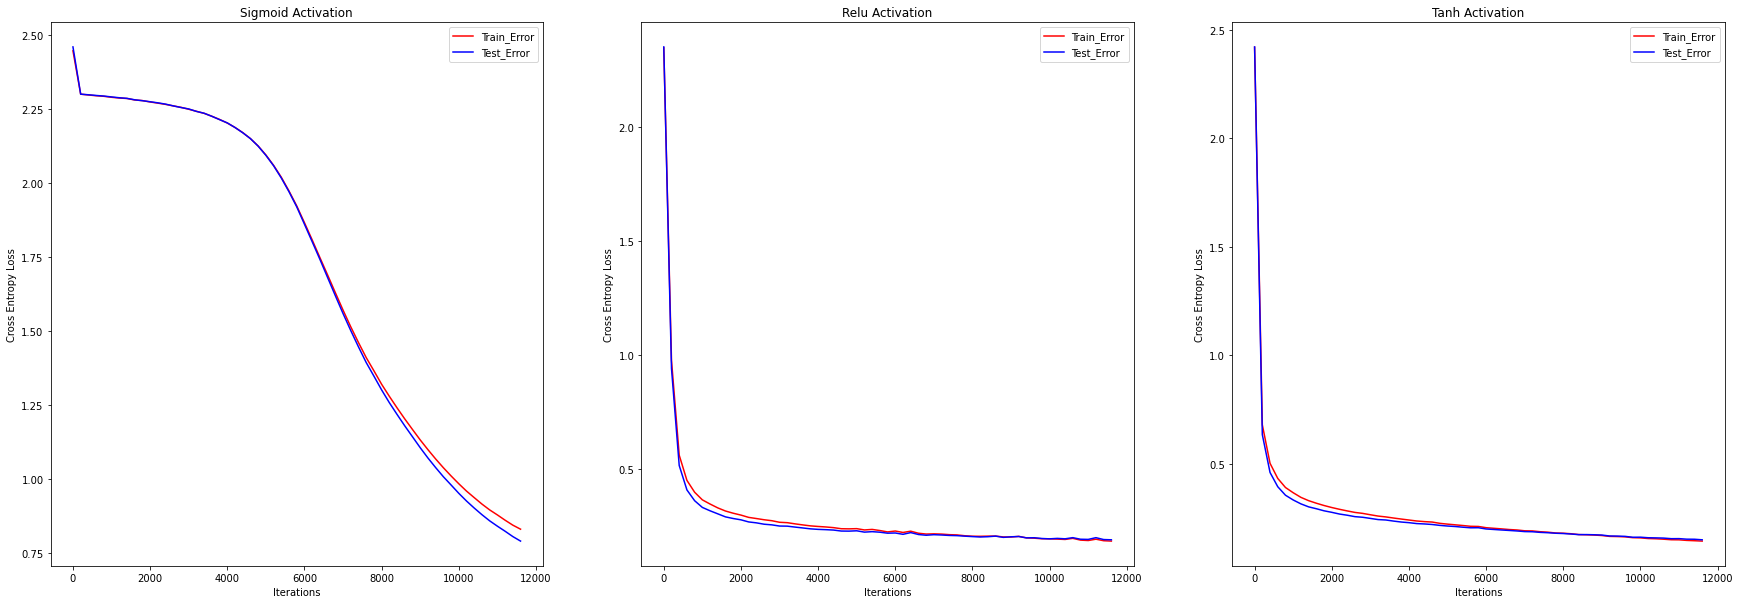

In [91]:
fig,axs=plt.subplots(1,3,figsize=(30,10))
axs[0].plot([200*i for i in range(len(train_error))],train_error,c='r',label='Train_Error')
axs[0].plot([200*i for i in range(len(train_error))],test_error,c='b',label="Test_Error")
axs[0].set_xlabel('Iterations')
axs[0].set_ylabel('Cross Entropy Loss')
axs[0].set_title('Sigmoid Activation')
axs[0].legend()

axs[1].plot([200*i for i in range(len(train_error2))],train_error2,c='r',label='Train_Error')
axs[1].plot([200*i for i in range(len(train_error2))],test_error2,c='b',label="Test_Error")
axs[1].set_xlabel('Iterations')
axs[1].set_ylabel('Cross Entropy Loss')
axs[1].set_title('Relu Activation')
axs[1].legend()

axs[2].plot([200*i for i in range(len(train_error3))],train_error3,c='r',label='Train_Error')
axs[2].plot([200*i for i in range(len(train_error3))],test_error3,c='b',label="Test_Error")
axs[2].set_xlabel('Iterations')
axs[2].set_ylabel('Cross Entropy Loss')
axs[2].set_title('Tanh Activation')
axs[2].legend()

Accuracy

In [92]:
[_,_,_,_,y_train_pred]=forward_pass(network,X_train,activation='sigmoid')
accuracy_sig=accuracy(y_train_pred,y_train)
[_,_,_,_,y_test_pred]=forward_pass(network,X_test,activation='sigmoid')
accuracy_sig_test=accuracy(y_test_pred,y_test)

[_,_,_,_,y_train_pred]=forward_pass(network2,X_train,activation='relu')
accuracy_relu=accuracy(y_train_pred,y_train)
[_,_,_,_,y_test_pred]=forward_pass(network2,X_test,activation='relu')
accuracy_relu_test=accuracy(y_test_pred,y_test)

[_,_,_,_,y_train_pred]=forward_pass(network3,X_train,activation='tanh')
accuracy_tanh=accuracy(y_train_pred,y_train)
[_,_,_,_,y_test_pred]=forward_pass(network3,X_test,activation='tanh')
accuracy_tanh_test=accuracy(y_test_pred,y_test)

print(f'Train Error using Sigmoid Activation: {accuracy_sig}')
print(f'Test Error using Sigmoid Activation: {accuracy_sig_test}')

print(f'Train Error using Relu Activation: {accuracy_relu}')
print(f'Test Error using Relu Activation: {accuracy_relu_test}')

print(f'Train Error using Tanh Activation: {accuracy_tanh}')
print(f'Test Error using Tanh Activation: {accuracy_tanh_test}')


Train Error using Sigmoid Activation: 76.71833333333333
Test Error using Sigmoid Activation: 77.01
Train Error using Relu Activation: 94.46166666666667
Test Error using Relu Activation: 93.9
Train Error using Tanh Activation: 95.895
Test Error using Tanh Activation: 95.45


Train Error using Sigmoid Activation: 76.71833333333333

Test Error using Sigmoid Activation: 77.01

Train Error using Relu Activation: 94.46166666666667

Test Error using Relu Activation: 93.9

Train Error using Tanh Activation: 95.895

Test Error using Tanh Activation: 95.45


In [97]:
[_,_,_,_,y_train_pred]=forward_pass(network,X_train,activation='sigmoid')
[_,_,_,_,y_test_pred]=forward_pass(network,X_test,activation='sigmoid')
y_train_pred_index=np.argmax(y_train_pred,axis=1)
y_train_index=np.argmax(y_train,axis=1)
cm = confusion_matrix(y_train_pred_index, y_train_index)

y_test_pred_index=np.argmax(y_test_pred,axis=1)
y_test_index=np.argmax(y_test,axis=1)
cm1 = confusion_matrix(y_test_pred_index, y_test_index)

print('confusion_matrix on train data for sigmoid activation')
print(cm)

print('confusion_matrix on test data for sigmoid activation')
print(cm1)

confusion_matrix on train data for sigmoid activation
[[5494    0   92   27   25  443   96   44   65   54]
 [   1 6495  208  116   51   29   31  292  291   69]
 [  27   63 3862  219    7  226  371    7  502    8]
 [  23   17  235 4583    0  674    2    3  593   52]
 [  32    0  195   10 4579  107   85   49   70  955]
 [ 286   14  230  494   11 3282   76   48  512  113]
 [  42    2  679   23  188  156 5242    2   84   15]
 [   1   15   37  142   45   92    0 5389   97 1018]
 [  16  123  388  479   27  309   15   82 3488   48]
 [   1   13   32   38  909  103    0  349  149 3617]]
confusion_matrix on test data for sigmoid activation
[[ 923    0   15    3    1   64   27    4   22   14]
 [   0 1109   30    9    9    3    2   50   28   12]
 [   1    5  678   36    3   30   43    6   95    0]
 [   1    5   39  785    0  149    0    1   94    5]
 [   3    0   29    2  762   13   16    6   18  179]
 [  43    0   32   73    1  514   17   10   88   22]
 [   7    1  104    1   33   32  852    0   

In [99]:
[_,_,_,_,y_train_pred]=forward_pass(network2,X_train,activation='relu')
[_,_,_,_,y_test_pred]=forward_pass(network2,X_test,activation='relu')
y_train_pred_index=np.argmax(y_train_pred,axis=1)
y_train_index=np.argmax(y_train,axis=1)
cm3 = confusion_matrix(y_train_pred_index, y_train_index)

y_test_pred_index=np.argmax(y_test_pred,axis=1)
y_test_index=np.argmax(y_test,axis=1)
cm4= confusion_matrix(y_test_pred_index, y_test_index)

print('confusion_matrix on train data for relu activation')
print(cm3)

print('confusion_matrix on test data for relu activation')
print(cm4)

confusion_matrix on train data for relu activation
[[5792    1   38   16    8   63   35   19   30   23]
 [   1 6590   32   26   19   15   12   21   62   19]
 [  12   34 5582   97   15   16   15   56   30    7]
 [   6   10   52 5575    4  159    3   18   67   38]
 [   9    8   53    3 5561   36   16   52   19  143]
 [  22   15   19  163    3 4900   50    9   90   23]
 [  34    4   58   15   47   81 5764    4   46    2]
 [   2    9   37   35    6    4    1 5893    6   55]
 [  34   55   67  134   21   98   22   13 5422   41]
 [  11   16   20   67  158   49    0  180   79 5598]]
confusion_matrix on test data for relu activation
[[ 964    0    9    2    1   10   11    0    8    8]
 [   0 1114    2    0    1    2    3    7    5    6]
 [   0    3  960   10    5    1    4   22    2    2]
 [   3    1    8  931    1   33    2    5   17    7]
 [   0    1    8    0  931    7    4    9    8   30]
 [   2    1    2   23    1  794    8    2   22    5]
 [   6    4   13    1   10   12  922    0   12    

In [100]:
[_,_,_,_,y_train_pred]=forward_pass(network3,X_train,activation='tanh')
[_,_,_,_,y_test_pred]=forward_pass(network3,X_test,activation='tanh')
y_train_pred_index=np.argmax(y_train_pred,axis=1)
y_train_index=np.argmax(y_train,axis=1)
cm5 = confusion_matrix(y_train_pred_index, y_train_index)

y_test_pred_index=np.argmax(y_test_pred,axis=1)
y_test_index=np.argmax(y_test,axis=1)
cm6= confusion_matrix(y_test_pred_index, y_test_index)

print('confusion_matrix on train data for tanh activation')
print(cm5)

print('confusion_matrix on test data for tanh activation')
print(cm6)

confusion_matrix on train data for tanh activation
[[5790    1   16    8    8   26   23   15   19   20]
 [   2 6621   19   17   18   14    9   22   62   17]
 [  10   28 5687   82   24   24   14   45   26    7]
 [   7   16   38 5776    2  103    0    6   72   42]
 [   7    7   46    3 5580   25   12   38   12   86]
 [  19    9   12   71    2 5047   32    5   38   17]
 [  33    1   35   14   37   65 5802    2   32    2]
 [   4   10   44   41   10   11    1 6037   13   69]
 [  37   37   48   85   10   68   25    8 5538   30]
 [  14   12   13   34  151   38    0   87   39 5659]]
confusion_matrix on test data for tanh activation
[[ 966    0    5    0    1   10    9    1    4    7]
 [   0 1118    1    1    1    3    3   10    3    7]
 [   1    2  983   12    8    2    6   16    4    2]
 [   3    2    6  966    0   23    1    3   15    8]
 [   0    1    7    0  927    2    2    3    4   16]
 [   2    1    1    5    0  815    7    1    6    4]
 [   4    4    7    1    5   12  926    0    6    

Comments:

1. MLP trained with Relu and Tanh as activation show a much steeper decrease in loss compared to when using sigmoid activation.
2. The tanh activation emerged as the best performing activation function.
3. The sigmoid activation did not perform as well as the Relu and tanh activations respectively due to issues like saturating gradients and non negative activation values etc

# Utlising Pytorch

In [67]:
class MLP_adam(nn.Module):

    def __init__(self, input_dim=784, hidden_dim1=500, hidden_dim2=250, hidden_dim3=100, output_dim=10):
        super(MLP_adam, self).__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim1)
        
        self.layer2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.layer3 = nn.Linear(hidden_dim2, hidden_dim3)
        self.output_layer = nn.Linear( hidden_dim3, output_dim)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.tanh=nn.Tanh()
        self.softmax=nn.Softmax()
        """torch.nn.init.xavier_uniform_(self.layer1.weight)
        torch.nn.init.xavier_uniform_(self.layer2.weight)
        torch.nn.init.xavier_uniform_(self.layer3.weight)
        torch.nn.init.xavier_uniform_(self.output_layer.weight)"""

    def forward(self, x):
        # First layer
        out1 = self.tanh(self.layer1(x))

        # Second layer
        out2 = self.tanh(self.layer2(out1))

        # Third layer
        out3 = self.tanh(self.layer3(out2))


        output = (self.output_layer(out3))

        return output

In [109]:
def train_model(model, X,y, criterion, optimizer, num_epochs=10, device='cpu'):
    X_train=X[:50000]
    y_train=y[:50000]
    X_test=X[50000:]
    y_test=y[50000:]
    dataset = TensorDataset(torch.Tensor(X_train), torch.Tensor(y_train))
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    model.train()
    train_error=[]
    test_error=[]

    updates=0
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)

            if updates%200==0:
                train_output = model(torch.tensor(X_train, dtype=torch.float32).to(device))
                train_loss = criterion(train_output, torch.tensor(y_train,dtype=torch.float32))
                train_error.append(train_loss.item())
                test_output=model(torch.tensor(X_test,dtype=torch.float32).to(device))
                test_loss=criterion(test_output,torch.tensor(y_test,dtype=torch.float32))
                test_error.append(test_loss.item())
                #print(train_loss)
                
            # Zero the parameter gradients
            updates+=1
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()
            running_loss += loss.item()



        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(dataloader):.4f}')

    print('Training complete.')
    return [model,train_error,test_error]


In [110]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

batch_size = 64
learning_rate = 0.01
num_epochs = 15

model = MLP_adam().to(device)
criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(), lr=learning_rate)


[model,train_error_adam,test_error_adam]=train_model(model, X_train,y_train, criterion, optimizer, num_epochs=num_epochs, device=device)

Text(0, 0.5, 'Cross Entropy Loss')

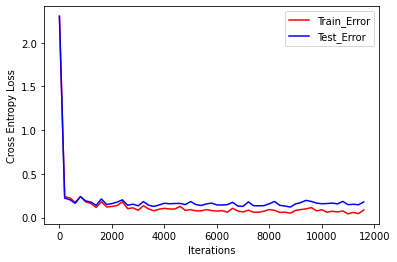

In [114]:
plt.plot([200*i for i in range(len(train_error_adam))],train_error_adam,c='r',label='Train_Error')
plt.plot([200*i for i in range(len(test_error_adam))],test_error_adam,c='b',label='Test_Error')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Cross Entropy Loss')

In [121]:
y_pred_train=model(torch.tensor(X_train, dtype=torch.float32).to(device)).detach().cpu().numpy()
y_pred_test=model(torch.tensor(X_test, dtype=torch.float32).to(device)).detach().cpu().numpy()
accuracy_train=accuracy(y_pred_train,y_train)
accuracy_test=accuracy(y_pred_test,y_test)
print(f'Train Accuracy using Tanh activation and Adam optimizer: {accuracy_train}')
print(f'Test Accuracy using Tanh activation and Adam optimizer :{ accuracy_test}')


Train Accuracy using Tanh activation and Adam optimizer: 97.725
Test Accuracy using Tanh activation and Adam optimizer :96.66


Train Accuracy using Tanh activation and Adam optimizer: 97.725

Test Accuracy using Tanh activation and Adam optimizer :96.66


In [124]:
y_train_pred_index=np.argmax(y_pred_train,axis=1)
y_train_index=np.argmax(y_train,axis=1)
cm7 = confusion_matrix(y_train_pred_index, y_train_index)

y_test_pred_index=np.argmax(y_pred_test,axis=1)
y_test_index=np.argmax(y_test,axis=1)
cm8= confusion_matrix(y_test_pred_index, y_test_index)

print('confusion_matrix on train data for Tanh activation using ADAM')
print(cm7)

print('confusion_matrix on test data for Tanh activation using ADAM')
print(cm8)

confusion_matrix on train data for Tanh activation using ADAM
[[5747    0    1    0    0    2    3    0    6    4]
 [   0 6680    3    5    1    1    0   11    8    2]
 [   5    7 5781   35    0    3    0    0    9    0]
 [   0    5   10 5929    0   19    3    0    7   26]
 [   0    8    1    0 5787    1    6    2    2   52]
 [   0    1    1   33    1 5263    0    0   13   15]
 [  44    3    5    2    3   73 5897    0   45    0]
 [   0    4   50   41   11    1    0 6228   14  151]
 [ 126   33  105   76   26   42    8   21 5736  112]
 [   1    1    1   10   13   16    1    3   11 5587]]
confusion_matrix on test data for Tanh activation using ADAM
[[ 937    0    0    0    0    2    2    0    4    0]
 [   0 1122    0    0    0    0    2    2    0    2]
 [   1    1  988    6    1    0    0    5    3    0]
 [   0    1    1  970    0    7    0    1    5    4]
 [   0    0    0    1  958    0    1    1    2   13]
 [   0    0    0    9    0  860    2    0    3    2]
 [   6    2    2    0    4  

**Comments**
1. The overall train and test accuracy on using the tanh activation for hidden layers has improved from 95.895 to 97.725 and 94.5 to 96.6 on utlising the ADAM optimiser.
2. The train and test error have also gone down by a factor of 2 from being ~1.6 to 0.086 etc.
3. The confusion matrix also indicates that the off diagonal elements are more closer to zero indicating better classification


# Regularisation

In [128]:
batch_size = 64
learning_rate = 0.01
num_epochs = 15

model1 = MLP_adam().to(device)
criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(model1.parameters(), lr=learning_rate,weight_decay=1e-4)


[model1,train_error_r1,test_error_r2]=train_model(model1, X_train,y_train, criterion, optimizer, num_epochs=num_epochs, device=device)

Epoch [1/15], Loss: 0.3090
Epoch [2/15], Loss: 0.1918
Epoch [3/15], Loss: 0.1718
Epoch [4/15], Loss: 0.1599
Epoch [5/15], Loss: 0.1440
Epoch [6/15], Loss: 0.1462
Epoch [7/15], Loss: 0.1399
Epoch [8/15], Loss: 0.1325
Epoch [9/15], Loss: 0.1347
Epoch [10/15], Loss: 0.1315
Epoch [11/15], Loss: 0.1313
Epoch [12/15], Loss: 0.1329
Epoch [13/15], Loss: 0.1297
Epoch [14/15], Loss: 0.1302
Epoch [15/15], Loss: 0.1276
Training complete.


In [129]:
batch_size = 64
learning_rate = 0.01
num_epochs = 15

model2 = MLP_adam().to(device)
criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(model2.parameters(), lr=learning_rate,weight_decay=1e-2)


[model2,train_error_r2,test_error_r2_]=train_model(model2, X_train,y_train, criterion, optimizer, num_epochs=num_epochs, device=device)

Epoch [1/15], Loss: 0.4827
Epoch [2/15], Loss: 0.3553
Epoch [3/15], Loss: 0.3473
Epoch [4/15], Loss: 0.3336
Epoch [5/15], Loss: 0.3289
Epoch [6/15], Loss: 0.3323
Epoch [7/15], Loss: 0.3198
Epoch [8/15], Loss: 0.3186
Epoch [9/15], Loss: 0.3188
Epoch [10/15], Loss: 0.3213
Epoch [11/15], Loss: 0.3202
Epoch [12/15], Loss: 0.3193
Epoch [13/15], Loss: 0.3159
Epoch [14/15], Loss: 0.3175
Epoch [15/15], Loss: 0.3195
Training complete.


In [131]:
batch_size = 64
learning_rate = 0.01
num_epochs = 15

model3 = MLP_adam().to(device)
criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(model3.parameters(), lr=learning_rate,weight_decay=1e-3)


[model3,train_error_r3,test_error_r3]=train_model(model3, X_train,y_train, criterion, optimizer, num_epochs=num_epochs, device=device)

Epoch [1/15], Loss: 0.3401
Epoch [2/15], Loss: 0.2280
Epoch [3/15], Loss: 0.2138
Epoch [4/15], Loss: 0.2054
Epoch [5/15], Loss: 0.1986
Epoch [6/15], Loss: 0.1964
Epoch [7/15], Loss: 0.1927
Epoch [8/15], Loss: 0.1931
Epoch [9/15], Loss: 0.1895
Epoch [10/15], Loss: 0.1924
Epoch [11/15], Loss: 0.1899
Epoch [12/15], Loss: 0.1905
Epoch [13/15], Loss: 0.1884
Epoch [14/15], Loss: 0.1921
Epoch [15/15], Loss: 0.1884
Training complete.


In [132]:
model4 = MLP_adam().to(device)
criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(model4.parameters(), lr=learning_rate,weight_decay=5e-3)


[model4,train_error_r4,test_error_r4]=train_model(model4, X_train,y_train, criterion, optimizer, num_epochs=num_epochs, device=device)

Epoch [1/15], Loss: 0.4129
Epoch [2/15], Loss: 0.3008
Epoch [3/15], Loss: 0.2848
Epoch [4/15], Loss: 0.2756
Epoch [5/15], Loss: 0.2748
Epoch [6/15], Loss: 0.2762
Epoch [7/15], Loss: 0.2741
Epoch [8/15], Loss: 0.2699
Epoch [9/15], Loss: 0.2641
Epoch [10/15], Loss: 0.2700
Epoch [11/15], Loss: 0.2620
Epoch [12/15], Loss: 0.2678
Epoch [13/15], Loss: 0.2624
Epoch [14/15], Loss: 0.2646
Epoch [15/15], Loss: 0.2647
Training complete.


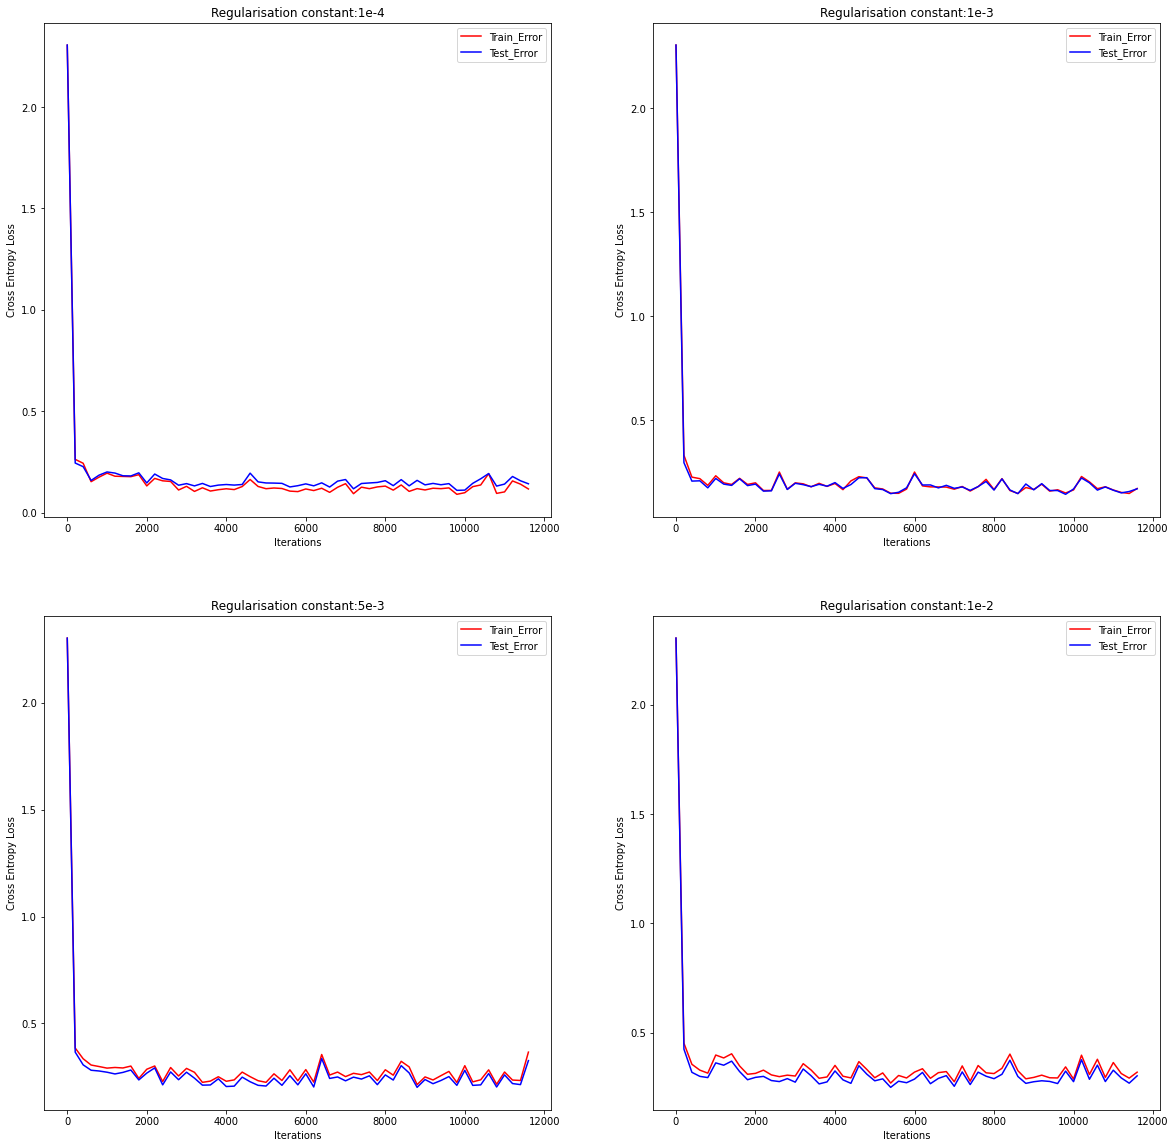

In [138]:
fig,axs=plt.subplots(2,2,figsize=(20,20))
axs[0,0].plot([200*i for i in range(len(train_error_r1))],train_error_r1,c='r',label='Train_Error')
axs[0,0].plot([200*i for i in range(len(train_error_r2))],test_error_r2,c='b',label="Test_Error")
axs[0,0].set_xlabel('Iterations')
axs[0,0].set_ylabel('Cross Entropy Loss')
axs[0,0].set_title('Regularisation constant:1e-4')
axs[0,0].legend()

axs[0,1].plot([200*i for i in range(len(train_error_r3))],train_error_r3,c='r',label='Train_Error')
axs[0,1].plot([200*i for i in range(len(train_error_r3))],test_error_r3,c='b',label="Test_Error")
axs[0,1].set_xlabel('Iterations')
axs[0,1].set_ylabel('Cross Entropy Loss')
axs[0,1].set_title('Regularisation constant:1e-3')
axs[0,1].legend()

axs[1,0].plot([200*i for i in range(len(train_error_r4))],train_error_r4,c='r',label='Train_Error')
axs[1,0].plot([200*i for i in range(len(train_error_r4))],test_error_r4,c='b',label="Test_Error")
axs[1,0].set_xlabel('Iterations')
axs[1,0].set_ylabel('Cross Entropy Loss')
axs[1,0].set_title('Regularisation constant:5e-3')
axs[1,0].legend()

axs[1,1].plot([200*i for i in range(len(train_error_r2))],train_error_r2,c='r',label='Train_Error')
axs[1,1].plot([200*i for i in range(len(test_error_r2_))],test_error_r2_,c='b',label="Test_Error")
axs[1,1].set_xlabel('Iterations')
axs[1,1].set_ylabel('Cross Entropy Loss')
axs[1,1].set_title('Regularisation constant:1e-2')
axs[1,1].legend()

In [134]:
y_pred_train1=model1(torch.tensor(X_train, dtype=torch.float32).to(device)).detach().cpu().numpy()
y_pred_test1=model1(torch.tensor(X_test, dtype=torch.float32).to(device)).detach().cpu().numpy()
accuracy_train1=accuracy(y_pred_train1,y_train)
accuracy_test1=accuracy(y_pred_test1,y_test)

y_pred_train2=model2(torch.tensor(X_train, dtype=torch.float32).to(device)).detach().cpu().numpy()
y_pred_test2=model2(torch.tensor(X_test, dtype=torch.float32).to(device)).detach().cpu().numpy()
accuracy_train2=accuracy(y_pred_train2,y_train)
accuracy_test2=accuracy(y_pred_test2,y_test)

y_pred_train3=model3(torch.tensor(X_train, dtype=torch.float32).to(device)).detach().cpu().numpy()
y_pred_test3=model3(torch.tensor(X_test, dtype=torch.float32).to(device)).detach().cpu().numpy()
accuracy_train3=accuracy(y_pred_train3,y_train)
accuracy_test3=accuracy(y_pred_test3,y_test)

y_pred_train4=model4(torch.tensor(X_train, dtype=torch.float32).to(device)).detach().cpu().numpy()
y_pred_test4=model4(torch.tensor(X_test, dtype=torch.float32).to(device)).detach().cpu().numpy()
accuracy_train4=accuracy(y_pred_train4,y_train)
accuracy_test4=accuracy(y_pred_test4,y_test)

print(f'Train Accuracy using Tanh activation and Adam optimizer with alpha=1e-4: {accuracy_train1}')
print(f'Test Accuracy using Tanh activation and Adam optimizer with alpha=1e-4:{ accuracy_test1}')

print(f'Train Accuracy using Tanh activation and Adam optimizer with alpha=1e-3: {accuracy_train3}')
print(f'Test Accuracy using Tanh activation and Adam optimizer with alpha=1e-3:{ accuracy_test3}')

print(f'Train Accuracy using Tanh activation and Adam optimizer with alpha=5e-3: {accuracy_train4}')
print(f'Test Accuracy using Tanh activation and Adam optimizer with alpha=5e-3:{ accuracy_test4}')

print(f'Train Accuracy using Tanh activation and Adam optimizer with alpha=1e-2: {accuracy_train2}')
print(f'Test Accuracy using Tanh activation and Adam optimizer with alpha=1e-2:{ accuracy_test2}')


Train Accuracy using Tanh activation and Adam optimizer with alpha=1e-4: 97.26833333333333
Test Accuracy using Tanh activation and Adam optimizer with alpha=1e-4:96.5
Train Accuracy using Tanh activation and Adam optimizer with alpha=1e-3: 94.22833333333334
Test Accuracy using Tanh activation and Adam optimizer with alpha=1e-3:93.95
Train Accuracy using Tanh activation and Adam optimizer with alpha=5e-3: 92.735
Test Accuracy using Tanh activation and Adam optimizer with alpha=5e-3:92.67999999999999
Train Accuracy using Tanh activation and Adam optimizer with alpha=1e-2: 91.39
Test Accuracy using Tanh activation and Adam optimizer with alpha=1e-2:92.01


Train Accuracy using Tanh activation and Adam optimizer with alpha=1e-4: 97.26833333333333

Test Accuracy using Tanh activation and Adam optimizer with alpha=1e-4:96.5

Train Accuracy using Tanh activation and Adam optimizer with alpha=1e-3: 94.22833333333334

Test Accuracy using Tanh activation and Adam optimizer with alpha=1e-3:93.95

Train Accuracy using Tanh activation and Adam optimizer with alpha=5e-3: 92.735

Test Accuracy using Tanh activation and Adam optimizer with alpha=5e-3:92.67999999999999

Train Accuracy using Tanh activation and Adam optimizer with alpha=1e-2: 91.39

Test Accuracy using Tanh activation and Adam optimizer with alpha=1e-2:92.01


In [139]:
y_train_pred_index1=np.argmax(y_pred_train1,axis=1)
y_train_index1=np.argmax(y_train,axis=1)
cm9 = confusion_matrix(y_train_pred_index1, y_train_index1)

y_test_pred_index1=np.argmax(y_pred_test1,axis=1)
y_test_index1=np.argmax(y_test,axis=1)
cm10= confusion_matrix(y_test_pred_index1, y_test_index1)

print('confusion_matrix on train data for Tanh activation using ADAM with alpha:1e-4')
print(cm9)

print('confusion_matrix on test data for Tanh activation using ADAM with alpha:1e-4')
print(cm10)

confusion_matrix on train data for Tanh activation using ADAM with alpha:1e-4
[[5824    1    8    0    3   16   16   20   13   14]
 [   1 6673   21    2    4    1    3    5   27    4]
 [  22   23 5830   58   24    6    8   79   35    3]
 [   3    6   35 5926    2   37    3   12   31   35]
 [   4    3    5    1 5608    2   15    3    6   17]
 [  21    2    9   85    3 5299  109    2  110   30]
 [  18    2    6    1   16    7 5748    0    7    1]
 [   0   13   12   17   16    1    0 6089   20   49]
 [  28   11   32   29    7   22   16    0 5587   19]
 [   2    8    0   12  159   30    0   55   15 5777]]
confusion_matrix on test data for Tanh activation using ADAM with alpha:1e-4
[[ 969    0    2    0    1    3    6    1    8    5]
 [   0 1122    3    1    0    0    2    3    0    5]
 [   2    3 1008    6    7    0    1   26   14    1]
 [   0    3    5  977    0   10    1    2    9    9]
 [   0    0    0    0  928    0    7    0    2    5]
 [   2    1    1   15    0  868   19    0   19   

**Comments**
1. L2 Regularisation was implemented with alpha :1e-4,1e-3,5e-3,1e-2 respectively.
2. In this case, the L2 regularisation has not helped increase the train and test accuracy in comparsion to when the regularisation is not used . Infact, the train and test accuracy show a marginal decrease as the alpha values are increased.
